In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
data={
    "area":[2600,3000,3200,3600,4000],
    "price":[550000,565000,610000,680000,725000]
}

In [3]:
df=pd.DataFrame(data)

In [4]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [5]:
df.to_csv('homeprice.csv')

In [6]:
df


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


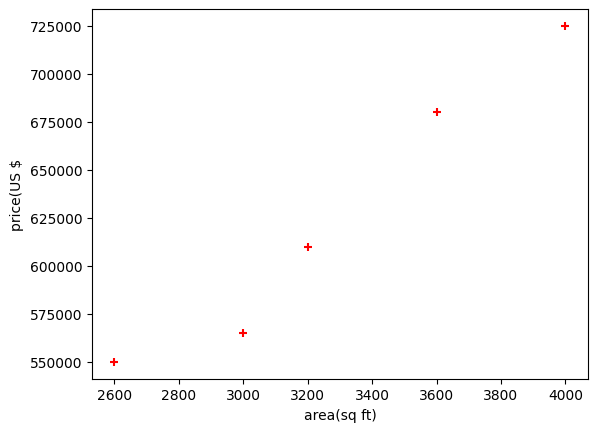

In [7]:
%matplotlib inline
plt.xlabel('area(sq ft)')
plt.ylabel('price(US $')
plt.scatter(df.area,df.price,color='red',marker='+')

In [8]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
reg.predict([[3300]])


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [10]:
reg.coef_

array([135.78767123])

In [11]:
reg.intercept_

np.float64(180616.43835616432)

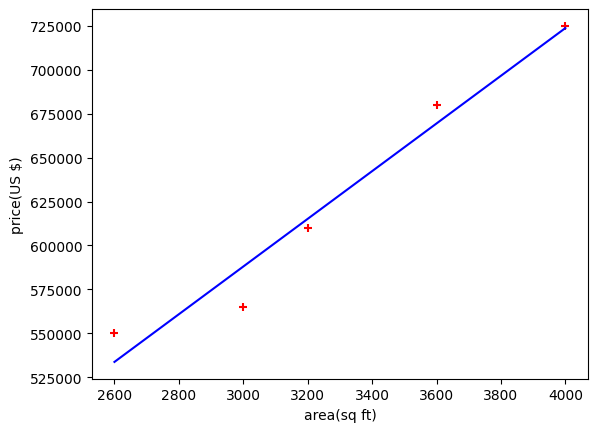

In [12]:
%matplotlib inline
plt.xlabel('area(sq ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')


In [13]:
data2={
    "area":[1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100]
    
}

In [14]:
df2=pd.DataFrame(data2)

In [15]:
df2


,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [16]:
df2.to_csv('area.csv')

In [17]:
df.head(3)

,area,price
0,2600,550000
1,3000,565000
2,3200,610000


In [18]:
df2.head(3)

,area
0,1000
1,1500
2,2300


In [19]:
p=reg.predict(df2)

In [20]:
df2['prices']=p

In [21]:
df2

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [22]:
import pickle 


In [24]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [25]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [27]:
mp.predict([[5000]])


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [30]:
import joblib
joblib.dump(reg, 'model_joblib')


['model_joblib']

In [31]:
mj=joblib.load('model_joblib')

In [33]:
mj.predict([[6000]])


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([995342.46575342])